In [1]:
import os
from preprocessing import *
import torch
from torchvision import transforms
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale
import matplotlib.pyplot as plt
from torch.optim import Adam
import numpy as np
import pylab as pl
from IPython import display

from tqdm import tqdm

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_PATH = "c:\\Users\\Aina\\OneDrive\\Escritorio\\White-Matter-Hyperintensity-Segmentation"+ "\\data"
TRAINING_PATH_AMSTERDAM= BASE_PATH + "\\training\\Amsterdam\\GE3T\\"
TRAINING_PATH_SINGAPORE= BASE_PATH + "\\training\\Singapore\\"
TRAINING_PATH_UTRECHT= BASE_PATH + "\\training\\Utrecht\\"

TEST_PATH_AMSTERDAM= BASE_PATH + "\\test\\Amsterdam\\"
TEST_PATH_SINGAPORE= BASE_PATH + "\\test\\Singapore\\"
TEST_PATH_UTRECHT= BASE_PATH + "\\test\\Utrecht\\"

In [3]:
TRAINING_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionaryM(TRAINING_PATH_UTRECHT, TRAINING_DICT,"Utrecht")
createDictionaryM(TRAINING_PATH_SINGAPORE, TRAINING_DICT, "Singapore")
createDictionaryM(TRAINING_PATH_AMSTERDAM, TRAINING_DICT,"Amsterdam")

In [4]:
TEST_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionaryM(TEST_PATH_UTRECHT, TEST_DICT,"Utrecht")
createDictionaryM(TEST_PATH_SINGAPORE, TEST_DICT,"Singapore")
createDictionaryM(os.path.join(TEST_PATH_AMSTERDAM, "GE1T5"), TEST_DICT,"Amsterdam")
createDictionaryM(os.path.join(TEST_PATH_AMSTERDAM, "GE3T"), TEST_DICT,"Amsterdam")
createDictionaryM(os.path.join(TEST_PATH_AMSTERDAM, "Philips_VU .PETMR_01"), TEST_DICT,"Amsterdam")

In [5]:
flair = nib.load(os.path.join(TRAINING_PATH_AMSTERDAM, "100", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TRAINING_PATH_SINGAPORE, "50", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TRAINING_PATH_UTRECHT, "0", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)

flair = nib.load(os.path.join(TEST_PATH_AMSTERDAM, "GE1T5","150", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TEST_PATH_AMSTERDAM, "GE3T","111", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TEST_PATH_AMSTERDAM, "Philips_VU .PETMR_01","160", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TEST_PATH_SINGAPORE, "70", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)
flair = nib.load(os.path.join(TEST_PATH_UTRECHT, "1", "pre", "FLAIR.nii.gz"))
flair_im= flair.get_fdata()
print(flair_im.shape)

(132, 256, 83)
(256, 232, 48)
(240, 240, 48)
(128, 256, 103)
(132, 256, 83)
(321, 240, 83)
(232, 256, 48)
(240, 240, 48)


In [29]:
transform=transforms.Compose([
    transforms.ToTensor()
])
train,val = getIDs(TRAINING_DICT)
print(len(train.get('pathsFLAIR')))
print(len(val.get('pathsFLAIR')))

48
12


In [30]:
train_data = MICAI(train.get("pathsFLAIR"),train.get("pathsT1"), train.get("mask"),transform, transform)
val_data = MICAI(val.get("pathsFLAIR"),val.get("pathsT1"), val.get("mask"),transform, transform)

In [8]:
# train_data = MICAI(TRAINING_DICT["pathsFLAIR"],TRAINING_DICT["pathsT1"],TRAINING_DICT["mask"],transform, transform)
# val_data = MICAI(TEST_DICT["pathsFLAIR"],TEST_DICT["pathsT1"], TEST_DICT["mask"],transform, transform)

In [12]:
print(train_data.__getitem__(0))

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,

# 3D-UNET

In [31]:
train_dl = DataLoader(train_data, batch_size=1,num_workers=0,shuffle=True)
val_dl = DataLoader(val_data, batch_size=1,num_workers=0, shuffle=True)

In [32]:
from UNet3D import UNet3D 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet3D(in_channels=1, num_classes=1)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
criterion.smooth = 1e-5
optimizer = Adam(model.parameters(), lr=0.0005)

In [33]:
def traintestpipeline(epochs: int, optim: Adam, criterion: DiceLoss, min_loss: int, name: str):
    t_loss = np.zeros((epochs))
    v_loss = np.zeros((epochs))
    pbar = tqdm(range(1, epochs+1)) # tdqm permet tenir text dinàmic
    for epoch in pbar:
        
        train_loss = 0 
        val_loss = 0  
        
        model.train()                                                  
        for batch_num, (input_img, target) in enumerate(train_dl, 1):   
        

            input_img= input_img.to(device).float()
            target = target.to(device).float()
            input_img=input_img.unsqueeze(0)
            
            output = model(input_img)
            loss = criterion(output.squeeze(), target.squeeze())
            loss.backward()                                            
            optim.step()                                               
            optim.zero_grad()     
            
            train_loss += loss.item()    
                                                        
        model.eval()   
        with torch.no_grad():                                          
            for input_img, target in val_dl: 
                input_img = input_img.to(device).float()
                target = target.to(device)
                input_img=input_img.unsqueeze(0)

                output = model(input_img)                                   
                loss = criterion(output.squeeze(), target.squeeze())   
                val_loss += loss.item()  
        
        # RESULTATS
        train_loss /= len(train_dl)
        t_loss[epoch-1] = train_loss
        
        val_loss /= len(val_dl)   
        v_loss[epoch-1] = val_loss
        if(v_loss[epoch-1]<min_loss):
            min_loss=v_loss[epoch-1]
            torch.save(model.state_dict(), name)  
        # VISUALITZACIO DINAMICA
        plt.figure(figsize=(12, 4))
        pl.plot(t_loss[:epoch], label="train")
        pl.plot(v_loss[:epoch], label="validation")
        pl.legend()
        pl.xlim(0, epochs)
        pl.xticks(range(0,epochs,1),range(1,epochs+1,1))
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.close()

        pbar.set_description(f"Epoch:{epoch} Training Loss:{train_loss} Validation Loss:{val_loss}")

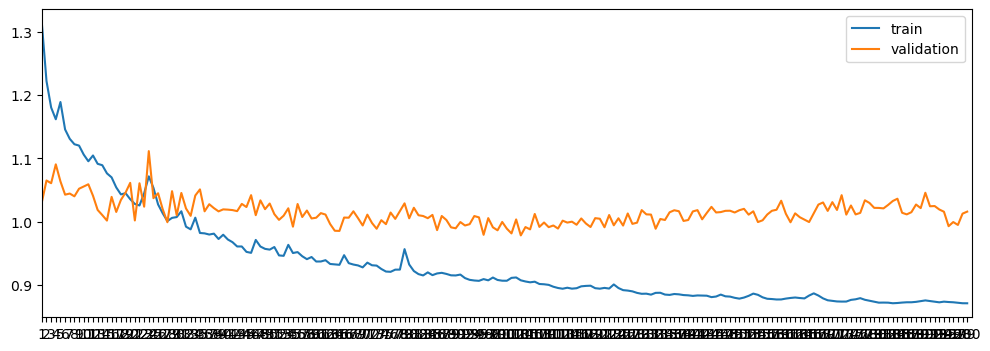

Epoch:200 Training Loss:0.8710845702172567 Validation Loss:1.0157864838775486: 100%|██████████| 200/200 [6:09:55<00:00, 110.98s/it]


In [16]:
traintestpipeline(200,optimizer,criterion,1000,"PRUEBAMICAI.pt")

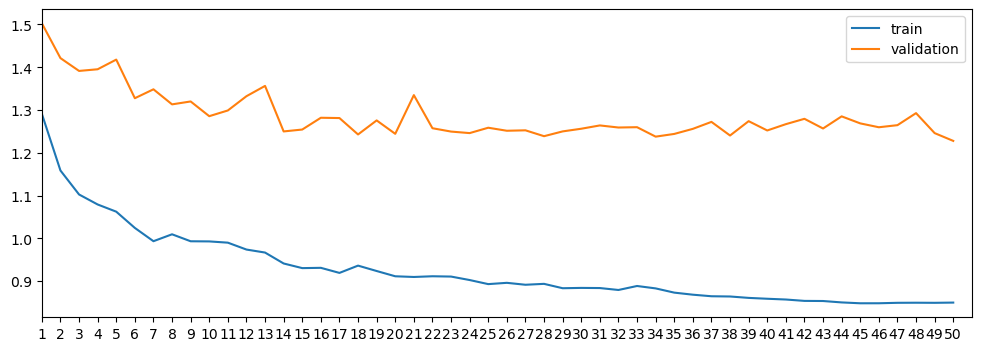

Epoch:50 Training Loss:0.8501514424569905 Validation Loss:1.2280044237853962: 100%|██████████| 50/50 [7:53:24<00:00, 568.09s/it]


In [34]:
model = UNet3D(in_channels=1, num_classes=1)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
criterion.smooth = 1e-5
optimizer = Adam(model.parameters(), lr=0.00005)
traintestpipeline(50,optimizer,criterion,1000,"PRUEBAMICAI2.pt")

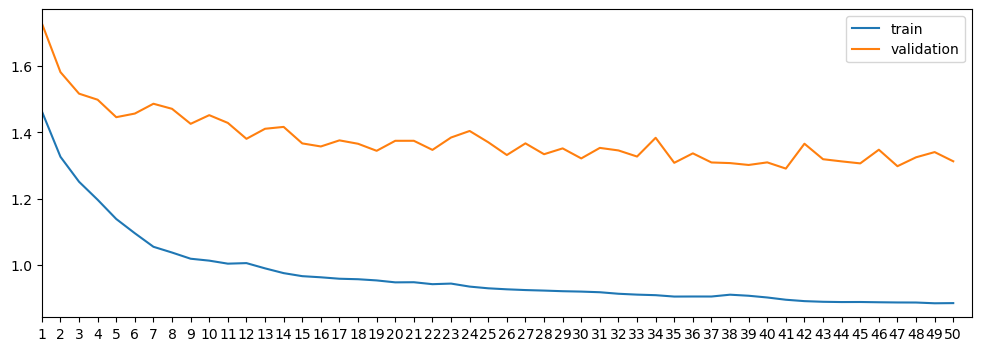

Epoch:50 Training Loss:0.8844333318993449 Validation Loss:1.312856038465936: 100%|██████████| 50/50 [8:29:11<00:00, 611.02s/it] 


In [35]:
model = UNet3D(in_channels=1, num_classes=1)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
criterion.smooth = 1e-5
optimizer = Adam(model.parameters(), lr=0.000005)
traintestpipeline(50,optimizer,criterion,1000,"PRUEBAMICAI3.pt")

In [11]:
model = UNet3D(in_channels=1, num_classes=1)
mmodel =  model.to(device)
mmodel.load_state_dict(torch.load("PRUEBAMICAI2.pt"))
mmodel.eval()

EOFError: Ran out of input

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
def generador(loader):
    for data, target in loader:
        data, target = data.to(device).float(), target.float().to(device)
        yield data, target 
def showsegmentation(test_dl, mmodel):               
    with torch.no_grad():
        gen = generador(test_dl)

        data, true_labels = next(gen)
        data = data.unsqueeze(0)
        mmodel.eval()

        output = mmodel(data)

        binary_mask_resized = output.squeeze().cpu().numpy()
        #binary_mask_resized = true_labels.squeeze().cpu().numpy()
        print(binary_mask_resized.shape)
        # verts,faces,_,_ = marching_cubes(binary_mask_resized, step_size=1)
        # fig = plt.figure(figsize=(10,10))
        # ax = fig.add_subplot(111,projection='3d')
        # mesh = Poly3DCollection(verts[faces], alpha=0.9)
        # face_color = [0.45,0.75, 0.45]
        # mesh.set_facecolor(face_color)
        # ax.add_collection3d(mesh)
        # ax.set_xlim(0, binary_mask_resized.shape[0])
        # ax.set_ylim(0, binary_mask_resized.shape[1])
        # ax.set_zlim(0, binary_mask_resized.shape[2])
        #show 3 gifs 
    # plt.tight_layout()
    # plt.show()
        return output
        

: 

In [13]:
output =showsegmentation(val_dl,mmodel)

(24, 128, 128)


(240, 240, 48)


KeyboardInterrupt: 

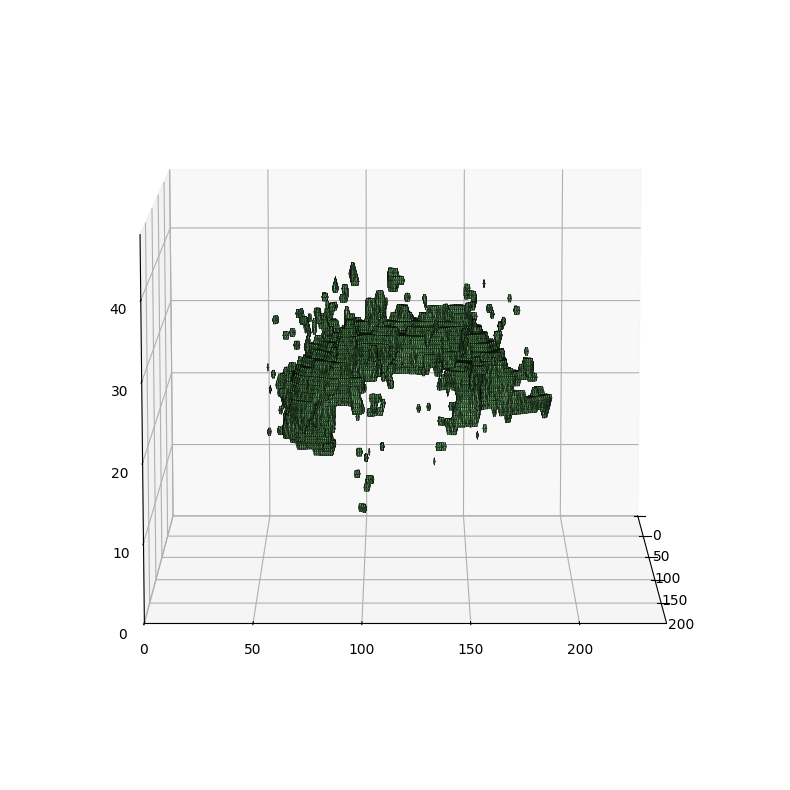

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation


img = nib.load(os.path.join(TRAINING_PATH_UTRECHT, "39","wmh.nii.gz"))
binary_mask = img.get_fdata() 
binary_mask[binary_mask==2]=0
#binary_mask_resized = resize(binary_mask, (98, 98, 98), preserve_range=True)
#binary_mask= output.squeeze().cpu().numpy()
print(binary_mask.shape)
binary_mask_resized = (binary_mask > 0).astype(int)

verts,faces,_,_ = marching_cubes(binary_mask_resized, step_size=1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
mesh = Poly3DCollection(verts[faces], alpha=0.6, linewidths=0.2, edgecolors='k')
face_color = [0.45,0.75, 0.45]
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)
ax.set_xlim(0, binary_mask_resized.shape[0])
ax.set_ylim(0, binary_mask_resized.shape[1])
ax.set_zlim(0, binary_mask_resized.shape[2])
def update(angle):
    ax.view_init(elev=10, azim=angle)

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
ani.save('prueba.gif', writer='pillow', fps=30)
plt.show()

# PRUEBA 1

https://github.com/aimalrehman92/CardiacMRI_3D_UNet_Pytorch/blob/master/3D_Cardiac_UNet.ipynb 

In [12]:
from Pure_SA_3D_8x8_2_architecture import SA_UNet_8x8 as Model
# training settings
n_epochs = 50
batch_size = 4
saveModelevery = 1
validateModelevery = 1
distort_after_every_epoch = 2
lambda_pixel_loss, lambda_dice_loss = 1, 0

# training images count and validation images count
n_train_images = len(train_data)
n_valid_images = len(val_data)

print("Training subjects: ", n_train_images)
print("Validation subjects: ", n_valid_images)

# optimizer hyperparameters
lr = 0.0002
b1 = 0.5
b2 = 0.999
is_transform_train = True
is_transform_valid = False
generate_epoch_log = True
shuffle_minibatch = True
apply_method = "Altogether" # can be "OneOf" or "Altogether"
save_every_SA = False

Training subjects:  48
Validation subjects:  12


In [13]:
cuda = True if torch.cuda.is_available() else False
print("Torch.Cuda available: ", cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)


Torch.Cuda available:  True
Device:  cuda:0


In [14]:
train_dl = DataLoader(train_data, batch_size=batch_size,num_workers=0,shuffle=shuffle_minibatch)
val_dl = DataLoader(val_data, batch_size=batch_size,num_workers=0, shuffle=shuffle_minibatch)

In [15]:
pixel_loss_function = nn.CrossEntropyLoss()
model = Model()

In [18]:
from torchsummary import summary
print("****** Model Summary ******")
summary(model, input_size = [(1, 88, 88, 88)], batch_size = -1)

****** Model Summary ******


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same